## Library installation

In [2]:
#Libraries to import

import pandas as pandas
import yfinance as yfinance
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as sgt
import numpy as np
import time

## Data Initialisation (Cleaning)

In [35]:
#Scrapigng the data for stock prices

import yfinance as yf
import pandas as pd
tickers = ["^GSPC", "NDAQ", "AAPL", "NVDA", "MSFT", "NFLX"]
start_date = "2020-01-01"
end_date = "2025-03-01"

data = yf.download(tickers, start=start_date, end=end_date)
data.to_csv('/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/dataframe.csv')
stocks = pd.read_csv('/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/dataframe.csv')

[*********************100%***********************]  6 of 6 completed


In [36]:
#Cleaning the data 
stocks.drop(["Close", "Close.1", "Close.2", "Close.3", "Close.4"], axis=1, inplace=True)
stocks.drop(["High", "High.1", "High.2", "High.3", "High.4"], axis=1, inplace=True)
stocks.drop(["Volume", "Volume.1", "Volume.2", "Volume.3", "Volume.4"], axis=1, inplace=True)
stocks.drop(["Low", "Low.1", "Low.2", "Low.3", "Low.4"], axis=1, inplace=True)

In [37]:
stocks.head()

,Price,Close.5,High.5,Low.5,Open,Open.1,Open.2,Open.3,Open.4,Open.5,Volume.5
0,Ticker,^GSPC,^GSPC,^GSPC,AAPL,MSFT,NDAQ,NFLX,NVDA,^GSPC,^GSPC
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,3257.85009765625,3258.139892578125,3235.530029296875,71.72101896406637,151.5668495220527,33.26335090509653,326.1000061035156,5.943831396827032,3244.669921875,3459930000
3,2020-01-03,3234.85009765625,3246.14990234375,3222.340087890625,71.9413434276417,151.12774851363613,33.17652203794167,326.7799987792969,5.852961693799672,3226.360107421875,3484700000
4,2020-01-06,3246.280029296875,3246.840087890625,3214.639892578125,71.12785848416316,149.9440697335836,33.42772256063357,323.1199951171875,5.783752677551418,3217.550048828125,3702460000


In [38]:
#Complete remaining data cleaning in Excel and then reimport back:
# Save the DataFrame to an Excel file
# Save the DataFrame to a CSV file
stocks.to_csv('/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/dataframe.csv', index=False)


In [39]:
#Decided to change the variable name to dataframe after edits made in Excel for clarity
#Treated 'stocks' variable still as raw and uncleaned data
df = pd.read_csv('/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/dataframe_cleaned.csv')

In [40]:
df = df.round(2)
df.head()

,Date,SPX,NDAQ,AAPL,MSFT,NFLX,NVDA
0,02/01/2020,3244.67,33.26,71.72,151.57,326.10,5.94
1,03/01/2020,3226.36,33.18,71.94,151.13,326.78,5.85
2,06/01/2020,3217.55,33.43,71.13,149.94,323.12,5.78
3,07/01/2020,3241.86,33.49,72.59,152.08,336.47,5.93
4,08/01/2020,3238.59,33.03,71.94,151.71,331.49,5.97


In [41]:
import time
if isinstance(df.index, pd.DatetimeIndex):
    print("Time Series has been set")
else:
    print("Time Series has not been set yet")
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df.set_index('Date', inplace=True)
    time.sleep(3)
    print("It has been done now!")

    

Time Series has not been set yet
It has been done now!


In [42]:
df.describe()

,SPX,NDAQ,AAPL,MSFT,NFLX,NVDA
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,4311.514179,54.204611,154.549044,292.355351,485.037556,41.311928
std,812.911129,11.877937,43.819747,83.687970,174.911581,41.099052
min,2290.710000,23.960000,55.350000,131.140000,163.960000,4.980000
25%,3834.690000,47.150000,127.750000,230.230000,361.020000,13.750000
50%,4233.830000,54.910000,152.110000,279.610000,485.590000,21.840000
75%,4690.860000,60.550000,180.250000,358.160000,584.890000,47.470000
max,6134.500000,84.000000,257.910000,464.300000,1060.000000,153.030000


In [ ]:
#Segregating dataset into the training and testing model. We have decided to go for a (70:30 split)
#df = training set
#df_test = testing set
size = int(len(df)*0.7)
df, df_test = df.iloc[:size], df.iloc[size:] #df = training set and has 70% of the data, 
                                             #df_test = testing set and has 30% of the data

In [46]:
df.describe()

,SPX,NDAQ,AAPL,MSFT,NFLX,NVDA
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,3913.545854,50.243605,133.809438,246.777905,419.231852,18.359603
std,522.818995,9.949110,31.931321,49.617739,126.962349,8.875677
min,2290.710000,23.960000,55.350000,131.140000,163.960000,4.980000
25%,3595.190000,40.890000,117.885000,207.605000,326.765000,12.955000
50%,3990.080000,51.830000,140.390000,246.830000,428.200000,16.150000
75%,4325.765000,58.095000,156.340000,283.470000,515.355000,22.615000
max,4804.510000,68.130000,194.550000,356.870000,692.350000,47.440000


In [47]:
df_test.describe()

,SPX,NDAQ,AAPL,MSFT,NFLX,NVDA
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,5237.045641,63.416487,202.781923,398.352128,638.078000,94.690795
std,580.434900,10.855576,26.215709,38.626054,175.517531,36.866267
min,4139.390000,46.540000,164.570000,307.440000,351.000000,40.430000
25%,4742.377500,55.112500,178.760000,372.567500,481.997500,49.680000
50%,5255.700000,60.050000,193.575000,411.160000,627.235000,94.620000
75%,5737.720000,73.035000,226.900000,423.125000,713.560000,129.187500
max,6134.500000,84.000000,257.910000,464.300000,1060.000000,153.030000


## Visualising data and preparing for training phase

Text(0.5, 1.0, 'Stock Prices')

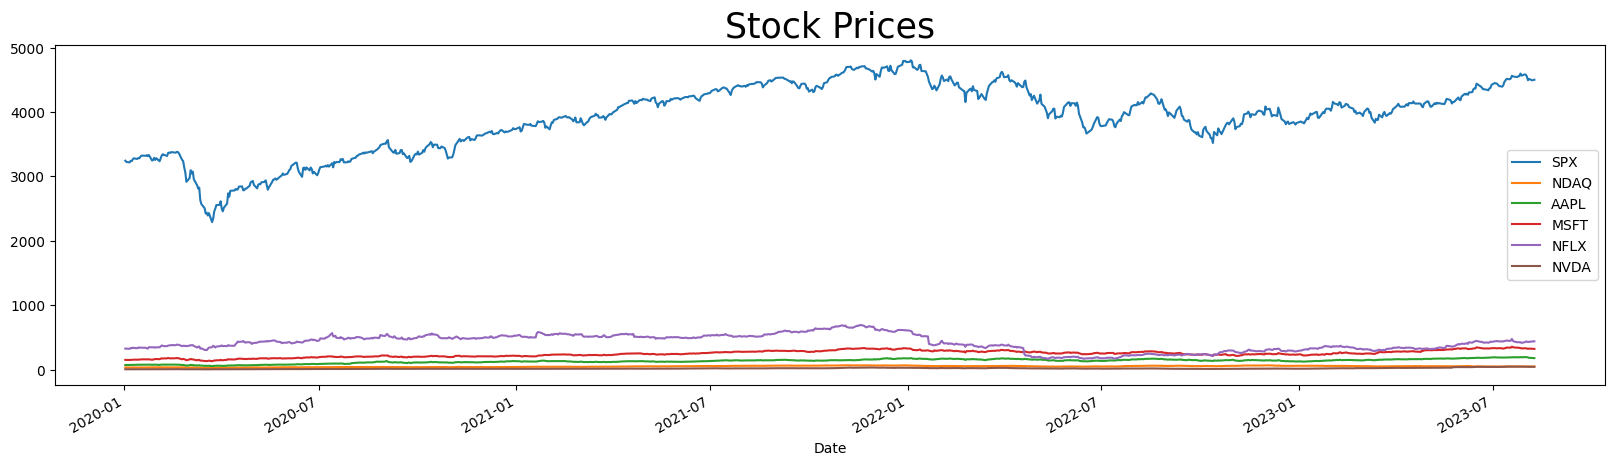

In [48]:
#We find that our S&P 500 prices is shown to be significantly higher compared to the other stocks, 
#so we should normalise prices, so they are in base units.
import matplotlib.pyplot as plt
df.plot(figsize=(20,5))
plt.title("Stock Prices", size = 25)

In [49]:
#We should normalise and log stock prices for both the training and testing sets, so that we are consistent throughout
df_norm = df/df.iloc[0]*100 #Create a new variable incase we want to visualise/test/forecast with the original data
df_norm_test = df_test/df.iloc[0]*100

import numpy as np   
df_log = np.log(df / df.shift(1))
df_log_test = np.log(df_test / df_test.shift(1))

Text(0.5, 1.0, 'Normalised Stock Prices')

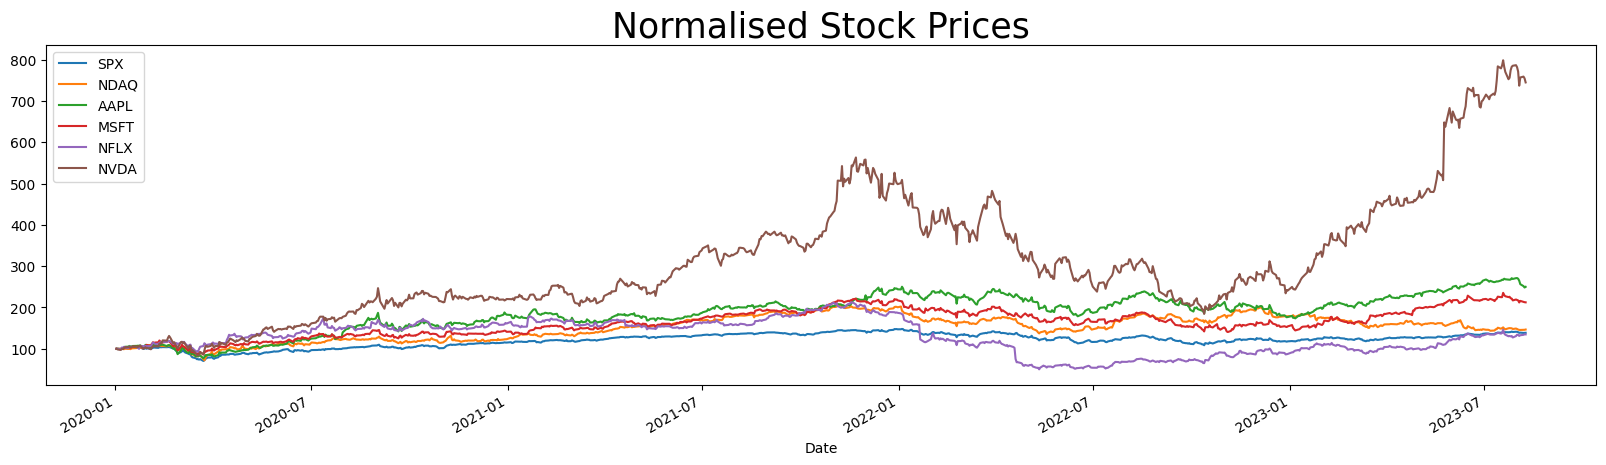

In [51]:
df_norm.plot(figsize=(20,5))
plt.title("Normalised Stock Prices", size = 25) 

Text(0.5, 1.0, 'Normalised Stock Prices')

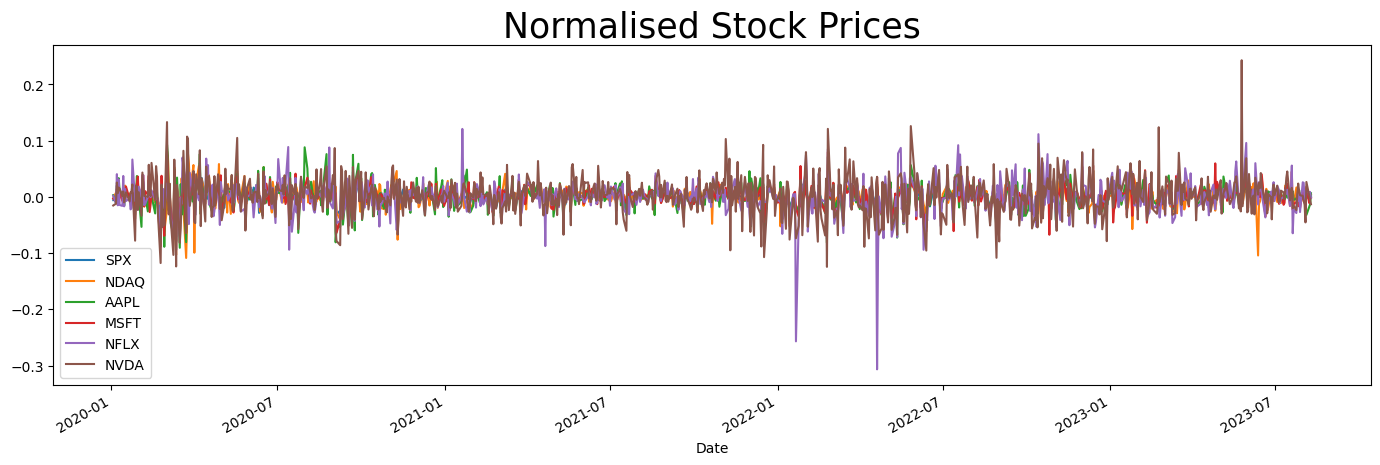

In [54]:
df_log.plot(figsize=(17,5))
plt.title("Normalised Stock Prices", size = 25) 

In [55]:
df.head(), df_log.head() 
#Since we have now log transformed our data, we need to be 
#careful when doing making interpretations

(                SPX   NDAQ   AAPL    MSFT    NFLX  NVDA
 Date                                                   
 2020-01-02  3244.67  33.26  71.72  151.57  326.10  5.94
 2020-01-03  3226.36  33.18  71.94  151.13  326.78  5.85
 2020-01-06  3217.55  33.43  71.13  149.94  323.12  5.78
 2020-01-07  3241.86  33.49  72.59  152.08  336.47  5.93
 2020-01-08  3238.59  33.03  71.94  151.71  331.49  5.97,
                  SPX      NDAQ      AAPL      MSFT      NFLX      NVDA
 Date                                                                  
 2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN
 2020-01-03 -0.005659 -0.002408  0.003063 -0.002907  0.002083 -0.015267
 2020-01-06 -0.002734  0.007506 -0.011323 -0.007905 -0.011263 -0.012038
 2020-01-07  0.007527  0.001793  0.020318  0.014171  0.040485  0.025621
 2020-01-08 -0.001009 -0.013831 -0.008995 -0.002436 -0.014911  0.006723)

### Testing for Stationarity (*note: here we use logarithimc transformed price, so then we don't have to difference our data*)

In [56]:
#st_test = ADF (Stationarity) Test
import statsmodels.tsa.stattools as sts
SPX_st_test = sts.adfuller(df_log.SPX[1:])
print(SPX_st_test)
NDAQ_st_test = sts.adfuller(df_log.NDAQ[1:])
print(NDAQ_st_test)
AAPL_st_test = sts.adfuller(df_log.AAPL[1:])
print(AAPL_st_test)
MSFT_st_test = sts.adfuller(df_log.MSFT[1:])
print(MSFT_st_test)
NFLX_st_test = sts.adfuller(df_log.NFLX[1:])
print(NFLX_st_test)
NVDA_st_test = sts.adfuller(df_log.NVDA[1:])
print(NVDA_st_test)

(np.float64(-28.30205692280013), 0.0, 0, 905, {'1%': np.float64(-3.437596348122793), '5%': np.float64(-2.86473892523805), '10%': np.float64(-2.5684733191905007)}, np.float64(-5253.754943161542))
(np.float64(-9.484129639461258), np.float64(3.802874025078819e-16), 7, 898, {'1%': np.float64(-3.4376529968296987), '5%': np.float64(-2.8647639026442993), '10%': np.float64(-2.5684866236774617)}, np.float64(-4538.725757656424))
(np.float64(-23.29360439811526), 0.0, 1, 904, {'1%': np.float64(-3.4376043869287467), '5%': np.float64(-2.8647424697167403), '10%': np.float64(-2.5684752071912444)}, np.float64(-4251.022000296884))
(np.float64(-23.832370393430743), 0.0, 1, 904, {'1%': np.float64(-3.4376043869287467), '5%': np.float64(-2.8647424697167403), '10%': np.float64(-2.5684752071912444)}, np.float64(-4452.557440616944))
(np.float64(-28.045936935535238), 0.0, 0, 905, {'1%': np.float64(-3.437596348122793), '5%': np.float64(-2.86473892523805), '10%': np.float64(-2.5684733191905007)}, np.float64(-3717

In [57]:
#Further justifies why we should use logarithmically transformed prices as opposed to original prices
from statsmodels.tsa.stattools import adfuller

# Drop rows with missing values
df_log_clean = df_log.dropna()

# Iterate over each column in the cleaned DataFrame
for column in df_log_clean.columns:
    result = adfuller(df_log_clean[column])
    print(f'p-value for {column}: {result[1]:5f}')

p-value for SPX: 0.000000
p-value for NDAQ: 0.000000
p-value for AAPL: 0.000000
p-value for MSFT: 0.000000
p-value for NFLX: 0.000000
p-value for NVDA: 0.000000


In [58]:
#With no transformation, we see that prices are non-stationary, meaning we would have required 
#differencing to an order of integration N I(N)
from statsmodels.tsa.stattools import adfuller

# Iterate over each column in the cleaned DataFrame
for column in df.columns:
    result = adfuller(df[column])
    print(f'p-value for {column}: {result[1]:5f}')

p-value for SPX: 0.558742
p-value for NDAQ: 0.358238
p-value for AAPL: 0.497410
p-value for MSFT: 0.523291
p-value for NFLX: 0.561513
p-value for NVDA: 0.984172


## ACF and PACF tests for AR and MA lags

### SPX

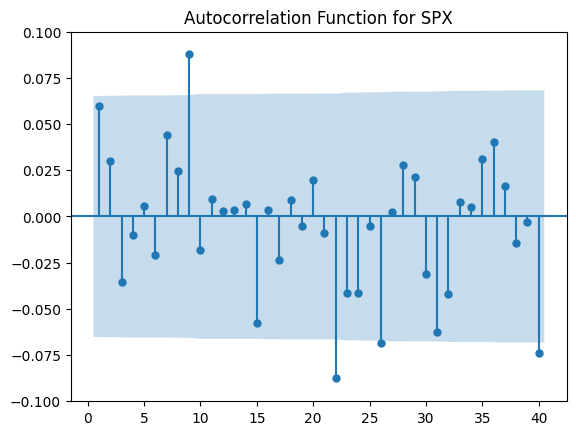

In [60]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df_log.SPX[1:], lags=40, zero=False)
plt.title('Autocorrelation Function for SPX')
plt.ylim(-0.1,0.1)
plt.show()
#Here, the ACF plot shows the 9th lag is significant, statistically different from 0, 
#so we shoudld check using the LLR test to determine whether it really is the best lag

In [61]:
AR1_SPX = ARIMA(df_log.SPX[1:], order=(1,0,0))
results_AR1_SPX = AR1_SPX.fit()
print(results_AR1_SPX.summary())

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python

                               SARIMAX Results                                
Dep. Variable:                    SPX   No. Observations:                  906
Model:                 ARIMA(1, 0, 0)   Log Likelihood                2699.446
Date:                Tue, 11 Mar 2025   AIC                          -5392.892
Time:                        13:33:39   BIC                          -5378.464
Sample:                             0   HQIC                         -5387.382
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      0.807      0.419      -0.001       0.001
ar.L1          0.0600      0.024      2.491      0.013       0.013       0.107
sigma2         0.0002   4.35e-06     34.746      0.0

In [62]:
AR2_SPX = ARIMA(df_log.SPX[1:], order=(2,0,0))
results_AR2_SPX = AR2_SPX.fit()
print(results_AR2_SPX.summary())

                               SARIMAX Results                                
Dep. Variable:                    SPX   No. Observations:                  906
Model:                 ARIMA(2, 0, 0)   Log Likelihood                2699.761
Date:                Tue, 11 Mar 2025   AIC                          -5391.522
Time:                        13:33:41   BIC                          -5372.286
Sample:                             0   HQIC                         -5384.176
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      0.774      0.439      -0.001       0.001
ar.L1          0.0583      0.024      2.424      0.015       0.011       0.105
ar.L2          0.0264      0.022      1.180      0.2

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [63]:
AR3_SPX = ARIMA(df_log.SPX[1:], order=(3,0,0))
results_AR3_SPX = AR3_SPX.fit()

AR4_SPX = ARIMA(df_log.SPX[1:], order=(4,0,0))
results_AR4_SPX = AR4_SPX.fit()

AR5_SPX = ARIMA(df_log.SPX[1:], order=(5,0,0))
results_AR5_SPX = AR5_SPX.fit()

AR6_SPX = ARIMA(df_log.SPX[1:], order=(6,0,0))
results_AR6_SPX = AR6_SPX.fit()

AR7_SPX = ARIMA(df_log.SPX[1:], order=(7,0,0))
results_AR7_SPX = AR7_SPX.fit()

AR8_SPX = ARIMA(df_log.SPX[1:], order=(8,0,0))
results_AR8_SPX = AR8_SPX.fit()

AR9_SPX = ARIMA(df_log.SPX[1:], order=(9,0,0))
results_AR9_SPX = AR9_SPX.fit()


/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python

### Creating LLR Test

In [64]:
from scipy.stats import chi2

def LLR_test(model1, model2, DF=1):
    L1 = model1.llf
    L2 = model2.llf
    LR = 2 * (L2 - L1)
    p_value = chi2.sf(LR, DF).round(4)
    return p_value

In [65]:

print(f"p-value = {LLR_test(results_AR1_SPX, results_AR2_SPX)}")
print(f"p-value = {LLR_test(results_AR2_SPX, results_AR3_SPX)}")
print(f"p-value = {LLR_test(results_AR3_SPX, results_AR4_SPX)}")
print(f"p-value = {LLR_test(results_AR4_SPX, results_AR5_SPX)}")
print(f"p-value = {LLR_test(results_AR5_SPX, results_AR6_SPX)}")
print(f"p-value = {LLR_test(results_AR6_SPX, results_AR7_SPX)}")
print(f"p-value = {LLR_test(results_AR7_SPX, results_AR8_SPX)}")
print(f"p-value = {LLR_test(results_AR8_SPX, results_AR9_SPX)}")
#We find through statistical tests that an AR(9) model is best fit for the S&P 500 data

p-value = 0.4272
p-value = 0.2403
p-value = 0.8507
p-value = 0.795
p-value = 0.4978
p-value = 0.1667
p-value = 0.5258
p-value = 0.0143


### We should also check the error term to see if we get a different optimal num of lags

In [75]:
AR9_SPX = ARIMA(df_log.SPX[1:], order=(9,0,0))
res_AR9_SPX = results_AR9_SPX.resid

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Residuals of AR(9) Model for S&P500')

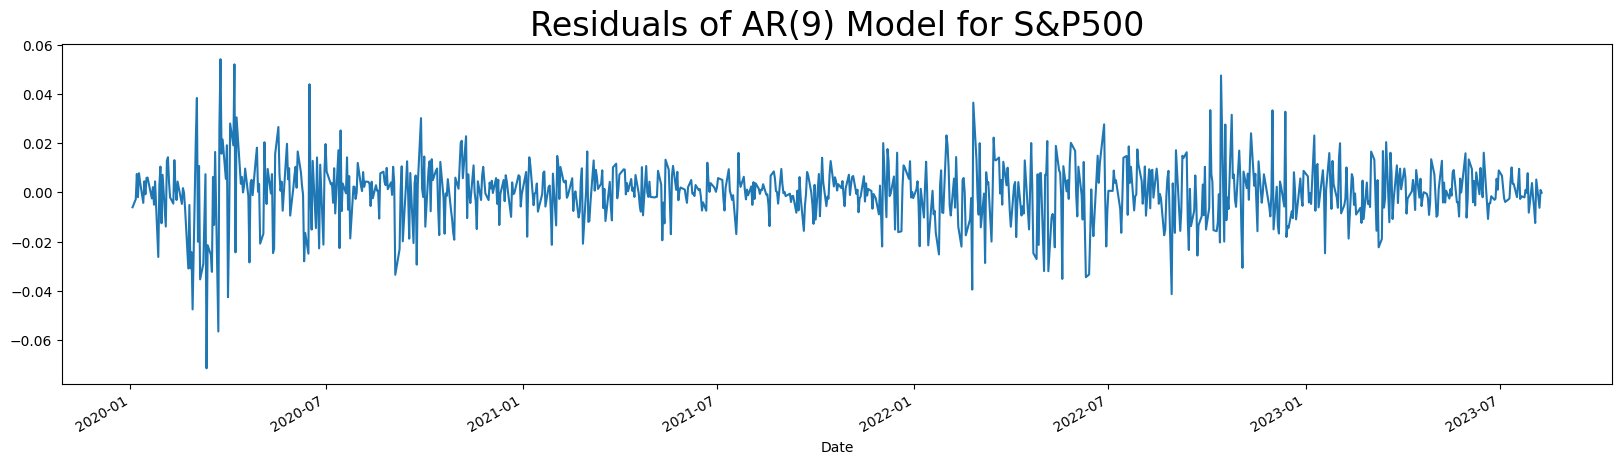

In [77]:
res_AR9_SPX.plot(figsize=(20,5))
plt.title("Residuals of AR(9) Model for S&P500", size = 24)


In [82]:
sts.adfuller(res_AR9_SPX)
#The residuals are stationary, so we can proceed with the AR(9) model

(np.float64(-29.997701111787247),
 0.0,
 0,
 905,
 {'1%': np.float64(-3.437596348122793),
  '5%': np.float64(-2.86473892523805),
  '10%': np.float64(-2.5684733191905007)},
 np.float64(-5264.0995096620545))

(-0.1, 0.1)

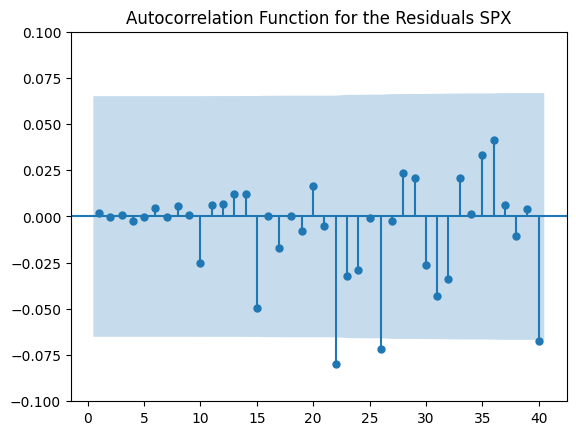

In [83]:
sgt.plot_acf(df.res_AR9_SPX[1:], lags=40, zero=False)
plt.title('Autocorrelation Function for the Residuals SPX')
plt.ylim(-0.1,0.1)

In [88]:
#We should repeat this process with the other stocks (and NDAQ) too

### NDAQ

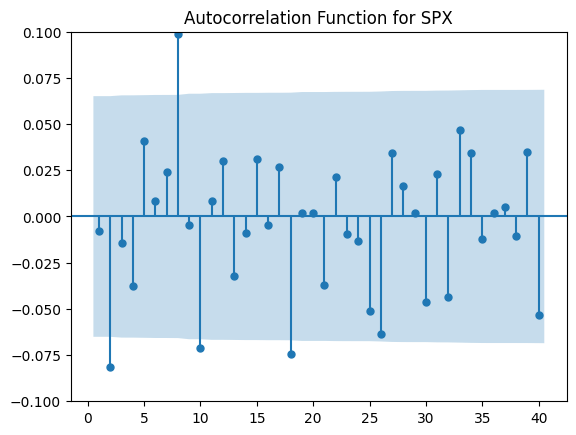

In [89]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df_log.NDAQ[1:], lags=40, zero=False)
plt.title('Autocorrelation Function for SPX')
plt.ylim(-0.1,0.1)
plt.show()
#Here, the ACF plot shows the 7th lag is significant, statistically different from 0, 
#so we shoudld check using the LLR test to determine whether it really is the best lag

In [90]:
AR1_NDAQ = ARIMA(df_log.NDAQ[1:], order=(1,0,0))
results_AR1_NDAQ = AR1_NDAQ.fit()
print(results_AR1_NDAQ.summary())

                               SARIMAX Results                                
Dep. Variable:                   NDAQ   No. Observations:                  906
Model:                 ARIMA(1, 0, 0)   Log Likelihood                2332.352
Date:                Tue, 11 Mar 2025   AIC                          -4658.704
Time:                        14:32:28   BIC                          -4644.277
Sample:                             0   HQIC                         -4653.195
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.661      0.508      -0.001       0.002
ar.L1         -0.0079      0.020     -0.391      0.696      -0.047       0.032
sigma2         0.0003   8.55e-06     39.757      0.0

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [93]:
AR2_NDAQ = ARIMA(df_log.NDAQ[1:], order=(2,0,0))
results_AR2_NDAQ = AR2_NDAQ.fit()
print(results_AR2_NDAQ.summary())

                               SARIMAX Results                                
Dep. Variable:                   NDAQ   No. Observations:                  906
Model:                 ARIMA(2, 0, 0)   Log Likelihood                2335.354
Date:                Tue, 11 Mar 2025   AIC                          -4662.708
Time:                        14:37:16   BIC                          -4643.472
Sample:                             0   HQIC                         -4655.362
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.707      0.480      -0.001       0.002
ar.L1         -0.0084      0.020     -0.418      0.676      -0.048       0.031
ar.L2         -0.0814      0.019     -4.241      0.0

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [97]:
AR3_NDAQ = ARIMA(df_log.NDAQ[1:], order=(3,0,0))
results_AR3_NDAQ = AR3_NDAQ.fit()
print(results_AR3_NDAQ.summary())

AR4_NDAQ = ARIMA(df_log.NDAQ[1:], order=(4,0,0))
results_AR4_NDAQ = AR4_NDAQ.fit()
print(results_AR4_NDAQ.summary())

AR5_NDAQ = ARIMA(df_log.NDAQ[1:], order=(5,0,0))
results_AR5_NDAQ = AR5_NDAQ.fit()
print(results_AR5_NDAQ.summary())

AR6_NDAQ = ARIMA(df_log.NDAQ[1:], order=(6,0,0))
results_AR6_NDAQ = AR6_NDAQ.fit()
print(results_AR6_NDAQ.summary())

AR7_NDAQ = ARIMA(df_log.NDAQ[1:], order=(7,0,0))
results_AR7_NDAQ = AR7_NDAQ.fit()
print(results_AR7_NDAQ.summary())

AR8_NDAQ = ARIMA(df_log.NDAQ[1:], order=(8,0,0))
results_AR8_NDAQ = AR8_NDAQ.fit()
print(results_AR8_NDAQ.summary())

AR9_NDAQ = ARIMA(df_log.NDAQ[1:], order=(9,0,0))
results_AR9_NDAQ = AR9_NDAQ.fit()
print(results_AR9_NDAQ.summary())

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python

                               SARIMAX Results                                
Dep. Variable:                   NDAQ   No. Observations:                  906
Model:                 ARIMA(3, 0, 0)   Log Likelihood                2335.466
Date:                Tue, 11 Mar 2025   AIC                          -4660.932
Time:                        14:42:19   BIC                          -4636.887
Sample:                             0   HQIC                         -4651.749
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.716      0.474      -0.001       0.002
ar.L1         -0.0097      0.020     -0.480      0.631      -0.050       0.030
ar.L2         -0.0815      0.019     -4.210      0.0

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   NDAQ   No. Observations:                  906
Model:                 ARIMA(5, 0, 0)   Log Likelihood                2337.009
Date:                Tue, 11 Mar 2025   AIC                          -4660.018
Time:                        14:42:20   BIC                          -4626.355
Sample:                             0   HQIC                         -4647.162
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.720      0.472      -0.001       0.002
ar.L1         -0.0088      0.021     -0.424      0.671      -0.050       0.032
ar.L2         -0.0842      0.020     -4.256      0.0

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   NDAQ   No. Observations:                  906
Model:                 ARIMA(6, 0, 0)   Log Likelihood                2337.011
Date:                Tue, 11 Mar 2025   AIC                          -4658.021
Time:                        14:42:20   BIC                          -4619.549
Sample:                             0   HQIC                         -4643.329
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.708      0.479      -0.001       0.002
ar.L1         -0.0088      0.021     -0.420      0.674      -0.050       0.032
ar.L2         -0.0835      0.020     -4.143      0.0

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   NDAQ   No. Observations:                  906
Model:                 ARIMA(7, 0, 0)   Log Likelihood                2337.410
Date:                Tue, 11 Mar 2025   AIC                          -4656.820
Time:                        14:42:21   BIC                          -4613.538
Sample:                             0   HQIC                         -4640.291
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.682      0.495      -0.001       0.002
ar.L1         -0.0085      0.021     -0.408      0.683      -0.049       0.032
ar.L2         -0.0847      0.020     -4.176      0.0

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   NDAQ   No. Observations:                  906
Model:                 ARIMA(8, 0, 0)   Log Likelihood                2342.011
Date:                Tue, 11 Mar 2025   AIC                          -4664.022
Time:                        14:42:23   BIC                          -4615.931
Sample:                             0   HQIC                         -4645.657
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.615      0.539      -0.001       0.002
ar.L1         -0.0115      0.021     -0.541      0.588      -0.053       0.030
ar.L2         -0.0851      0.020     -4.188      0.0

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   NDAQ   No. Observations:                  906
Model:                 ARIMA(9, 0, 0)   Log Likelihood                2342.024
Date:                Tue, 11 Mar 2025   AIC                          -4662.049
Time:                        14:42:24   BIC                          -4609.149
Sample:                             0   HQIC                         -4641.847
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.611      0.541      -0.001       0.002
ar.L1         -0.0119      0.022     -0.534      0.593      -0.056       0.032
ar.L2         -0.0854      0.020     -4.201      0.0

In [99]:
#Testing for the Likelihood Ratio
print(f"p-value = {LLR_test(results_AR1_NDAQ, results_AR2_NDAQ)}")
print(f"p-value = {LLR_test(results_AR2_NDAQ, results_AR3_NDAQ)}")
print(f"p-value = {LLR_test(results_AR3_NDAQ, results_AR4_NDAQ)}")
print(f"p-value = {LLR_test(results_AR4_NDAQ, results_AR5_NDAQ)}")
print(f"p-value = {LLR_test(results_AR5_NDAQ, results_AR6_NDAQ)}")
print(f"p-value = {LLR_test(results_AR6_NDAQ, results_AR7_NDAQ)}")
print(f"p-value = {LLR_test(results_AR7_NDAQ, results_AR8_NDAQ)}")


#Testing to see if the second lag is signficant, in order to minimise the number of lags we use
print(f"p-value = {LLR_test(results_AR2_NDAQ, results_AR8_NDAQ, DF = 6)}")
#We find that the 2nd lag is significant, so we should use the AR(2) model

p-value = 0.0143
p-value = 0.6365
p-value = 0.1805
p-value = 0.2556
p-value = 0.9539
p-value = 0.3716
p-value = 0.0024
p-value = 0.0383


In [102]:
print(f"LLR(2): {results_AR2_NDAQ.llf}, AR(2) AIC: {results_AR2_NDAQ.aic}, BIC: {results_AR2_NDAQ.bic}")
print(f"LLR(8): {results_AR8_NDAQ.llf}, AR(8) AIC: {results_AR8_NDAQ.aic}, BIC: {results_AR8_NDAQ.bic}")
#We find that we should prefer the AR(8) model, as it has a lower AIC and BIC and higher LLR

LLR(2): 2335.354237014498, AR(2) AIC: -4662.708474028996, BIC: -4643.472316804824
LLR(8): 2342.0108396735727, AR(8) AIC: -4664.021679347145, BIC: -4615.9312862867155


In [105]:
res_AR8_NDAQ = results_AR8_NDAQ.resid

Text(0.5, 1.0, 'Residuals of AR(8) Model for NDAQ')

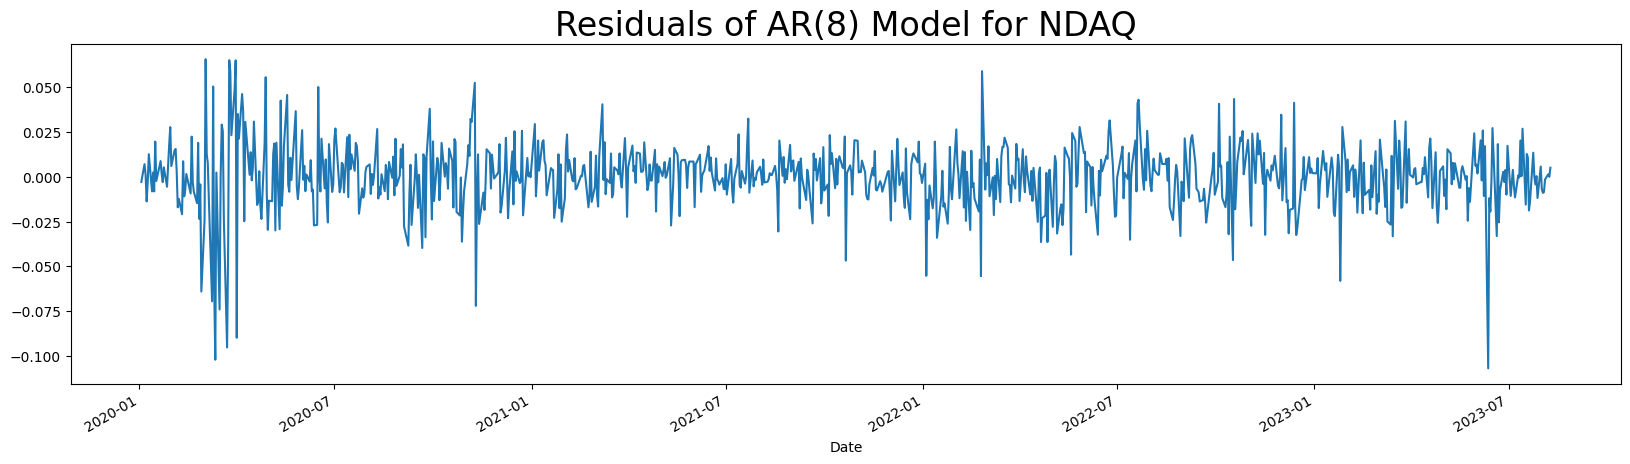

In [108]:
res_AR8_NDAQ.plot(figsize=(20,5))
plt.title("Residuals of AR(8) Model for NDAQ", size = 24)

In [109]:
sts.adfuller(res_AR8_NDAQ)

(np.float64(-30.080366873230368),
 0.0,
 0,
 905,
 {'1%': np.float64(-3.437596348122793),
  '5%': np.float64(-2.86473892523805),
  '10%': np.float64(-2.5684733191905007)},
 np.float64(-4552.708168329012))

(-0.1, 0.1)

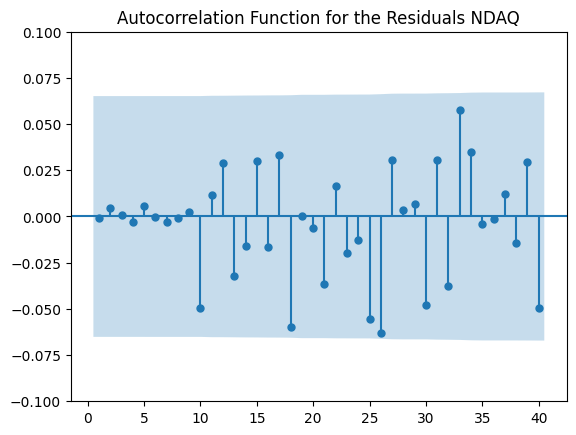

In [111]:
sgt.plot_acf(res_AR8_NDAQ[1:], lags=40, zero=False)
plt.title('Autocorrelation Function for the Residuals NDAQ')
plt.ylim(-0.1,0.1)

(-0.1, 0.1)

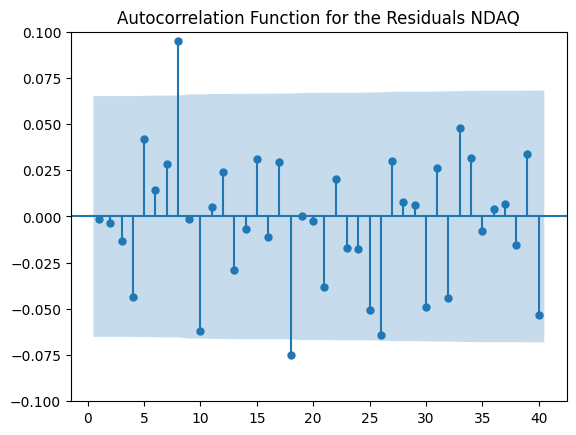

In [114]:
res_AR2_NDAQ = results_AR2_NDAQ.resid
sts.adfuller(res_AR2_NDAQ)
sgt.plot_acf(res_AR2_NDAQ[1:], lags=40, zero=False)
plt.title('Autocorrelation Function for the Residuals NDAQ')
plt.ylim(-0.1,0.1)
#After estimating the residuals for an AR(2) and AR(8) model, we find that the AR(8) model is best fit for NDAQ

### AAPL

(-0.1, 0.1)

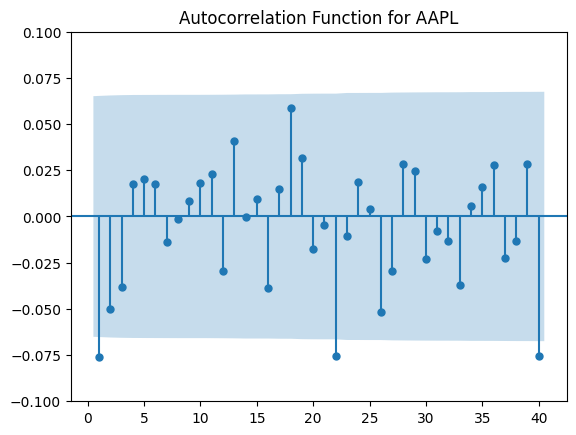

In [118]:
sgt.plot_acf(df_log.AAPL[1:], lags=40, zero=False)
plt.title('Autocorrelation Function for AAPL')
plt.ylim(-0.1,0.1)
#Optimal lag here is seen to be either 1 or 22

In [124]:
# Store results for LLR tests
results_list = []

# Loop through AR orders from 1 to 22
for p in range(1, 23):
    # Fit ARIMA model
    model = ARIMA(df_log['AAPL'][1:], order=(p, 0, 0))
    results = model.fit()
    
    # Print summary
    print(f"AR{p}_AAPL Summary:")
    print(results.summary())
    
    # Store results for LLR test
    results_list.append(results)

# Perform LLR tests between consecutive models
for i in range(len(results_list) - 1):
    p_value = LLR_test(results_list[i], results_list[i + 1])
    AIC_value = results_list[i].aic
    BIC_Value = results_list[i].bic
    print(f"p-value for LLR test between AR{i+1}_AAPL and AR{i+2}_AAPL = {p_value}, AIC = {AIC_value}, BIC = {BIC_Value}")


/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python

AR1_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                 ARIMA(1, 0, 0)   Log Likelihood                2181.777
Date:                Tue, 11 Mar 2025   AIC                          -4357.554
Time:                        15:31:41   BIC                          -4343.126
Sample:                             0   HQIC                         -4352.044
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.486      0.137      -0.000       0.002
ar.L1         -0.0762      0.023     -3.299      0.001      -0.121      -0.031
sigma2         0.0005   1.51e-05  

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR3_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                 ARIMA(3, 0, 0)   Log Likelihood                2184.191
Date:                Tue, 11 Mar 2025   AIC                          -4358.381
Time:                        15:31:42   BIC                          -4334.336
Sample:                             0   HQIC                         -4349.199
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.589      0.112      -0.000       0.002
ar.L1         -0.0825      0.024     -3.475      0.001      -0.129      -0.036
ar.L2         -0.0600      0.024  

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR4_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                 ARIMA(4, 0, 0)   Log Likelihood                2184.219
Date:                Tue, 11 Mar 2025   AIC                          -4356.438
Time:                        15:31:42   BIC                          -4327.583
Sample:                             0   HQIC                         -4345.419
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.576      0.115      -0.000       0.002
ar.L1         -0.0817      0.024     -3.441      0.001      -0.128      -0.035
ar.L2         -0.0598      0.024  

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python

AR6_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                 ARIMA(6, 0, 0)   Log Likelihood                2184.553
Date:                Tue, 11 Mar 2025   AIC                          -4353.107
Time:                        15:31:43   BIC                          -4314.634
Sample:                             0   HQIC                         -4338.415
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.496      0.135      -0.000       0.002
ar.L1         -0.0825      0.024     -3.472      0.001      -0.129      -0.036
ar.L2         -0.0602      0.025  

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR7_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                 ARIMA(7, 0, 0)   Log Likelihood                2184.577
Date:                Tue, 11 Mar 2025   AIC                          -4351.154
Time:                        15:31:44   BIC                          -4307.872
Sample:                             0   HQIC                         -4334.625
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.492      0.136      -0.000       0.002
ar.L1         -0.0825      0.024     -3.468      0.001      -0.129      -0.036
ar.L2         -0.0605      0.025  

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR8_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                 ARIMA(8, 0, 0)   Log Likelihood                2184.575
Date:                Tue, 11 Mar 2025   AIC                          -4349.151
Time:                        15:31:45   BIC                          -4301.060
Sample:                             0   HQIC                         -4330.786
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.493      0.135      -0.000       0.002
ar.L1         -0.0827      0.024     -3.463      0.001      -0.129      -0.036
ar.L2         -0.0610      0.026  

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR9_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                 ARIMA(9, 0, 0)   Log Likelihood                2184.606
Date:                Tue, 11 Mar 2025   AIC                          -4347.212
Time:                        15:31:46   BIC                          -4294.312
Sample:                             0   HQIC                         -4327.010
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.476      0.140      -0.000       0.002
ar.L1         -0.0821      0.024     -3.414      0.001      -0.129      -0.035
ar.L2         -0.0607      0.026  

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR10_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                ARIMA(10, 0, 0)   Log Likelihood                2184.748
Date:                Tue, 11 Mar 2025   AIC                          -4345.496
Time:                        15:31:48   BIC                          -4287.788
Sample:                             0   HQIC                         -4323.458
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.449      0.147      -0.000       0.002
ar.L1         -0.0821      0.024     -3.424      0.001      -0.129      -0.035
ar.L2         -0.0609      0.026 

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python

AR11_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                ARIMA(11, 0, 0)   Log Likelihood                2185.079
Date:                Tue, 11 Mar 2025   AIC                          -4344.158
Time:                        15:31:51   BIC                          -4281.641
Sample:                             0   HQIC                         -4320.284
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.400      0.161      -0.000       0.002
ar.L1         -0.0826      0.024     -3.453      0.001      -0.130      -0.036
ar.L2         -0.0609      0.026 

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR13_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                ARIMA(13, 0, 0)   Log Likelihood                2186.099
Date:                Tue, 11 Mar 2025   AIC                          -4342.199
Time:                        15:31:56   BIC                          -4270.063
Sample:                             0   HQIC                         -4314.651
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.373      0.170      -0.000       0.002
ar.L1         -0.0811      0.024     -3.360      0.001      -0.128      -0.034
ar.L2         -0.0616      0.026 

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR14_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                ARIMA(14, 0, 0)   Log Likelihood                2186.110
Date:                Tue, 11 Mar 2025   AIC                          -4340.220
Time:                        15:31:58   BIC                          -4263.275
Sample:                             0   HQIC                         -4310.836
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.359      0.174      -0.000       0.002
ar.L1         -0.0813      0.024     -3.355      0.001      -0.129      -0.034
ar.L2         -0.0615      0.026 

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR15_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                ARIMA(15, 0, 0)   Log Likelihood                2186.163
Date:                Tue, 11 Mar 2025   AIC                          -4338.327
Time:                        15:32:00   BIC                          -4256.573
Sample:                             0   HQIC                         -4307.106
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.343      0.179      -0.000       0.002
ar.L1         -0.0813      0.024     -3.354      0.001      -0.129      -0.034
ar.L2         -0.0620      0.027 

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR16_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                ARIMA(16, 0, 0)   Log Likelihood                2186.712
Date:                Tue, 11 Mar 2025   AIC                          -4337.425
Time:                        15:32:04   BIC                          -4250.862
Sample:                             0   HQIC                         -4304.368
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.383      0.167      -0.000       0.002
ar.L1         -0.0820      0.024     -3.380      0.001      -0.130      -0.034
ar.L2         -0.0596      0.027 

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR17_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                ARIMA(17, 0, 0)   Log Likelihood                2186.751
Date:                Tue, 11 Mar 2025   AIC                          -4335.502
Time:                        15:32:07   BIC                          -4244.130
Sample:                             0   HQIC                         -4300.608
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.357      0.175      -0.000       0.002
ar.L1         -0.0817      0.024     -3.363      0.001      -0.129      -0.034
ar.L2         -0.0597      0.027 

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR18_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                ARIMA(18, 0, 0)   Log Likelihood                2188.296
Date:                Tue, 11 Mar 2025   AIC                          -4336.592
Time:                        15:32:11   BIC                          -4240.411
Sample:                             0   HQIC                         -4299.862
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.275      0.202      -0.001       0.003
ar.L1         -0.0825      0.024     -3.375      0.001      -0.130      -0.035
ar.L2         -0.0575      0.027 

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR19_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                ARIMA(19, 0, 0)   Log Likelihood                2188.924
Date:                Tue, 11 Mar 2025   AIC                          -4335.848
Time:                        15:32:15   BIC                          -4234.858
Sample:                             0   HQIC                         -4297.281
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.226      0.220      -0.001       0.003
ar.L1         -0.0848      0.025     -3.391      0.001      -0.134      -0.036
ar.L2         -0.0581      0.027 

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR20_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                ARIMA(20, 0, 0)   Log Likelihood                2188.931
Date:                Tue, 11 Mar 2025   AIC                          -4333.862
Time:                        15:32:24   BIC                          -4228.063
Sample:                             0   HQIC                         -4293.459
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.228      0.219      -0.001       0.003
ar.L1         -0.0841      0.025     -3.363      0.001      -0.133      -0.035
ar.L2         -0.0579      0.028 

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR21_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                ARIMA(21, 0, 0)   Log Likelihood                2188.857
Date:                Tue, 11 Mar 2025   AIC                          -4331.714
Time:                        15:32:26   BIC                          -4221.106
Sample:                             0   HQIC                         -4289.475
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.215      0.224      -0.001       0.003
ar.L1         -0.0813      0.025     -3.256      0.001      -0.130      -0.032
ar.L2         -0.0592      0.028 

/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ivan/Documents/Data Science Projects/Portfolio_Forecast/arima/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR22_AAPL Summary:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  906
Model:                ARIMA(22, 0, 0)   Log Likelihood                2191.652
Date:                Tue, 11 Mar 2025   AIC                          -4335.304
Time:                        15:32:34   BIC                          -4219.887
Sample:                             0   HQIC                         -4291.228
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.327      0.185      -0.000       0.002
ar.L1         -0.0837      0.025     -3.368      0.001      -0.132      -0.035
ar.L2         -0.0582      0.028 

TypeError: 'list' object is not callable

In [127]:
print(f"AIC = {results_list[21].aic}, BIC = {results_list[21].bic}")

AIC = -4335.304337036712, BIC = -4219.887393691681
